# Trending Topics Word Cloud 🐦
The purpose of this project is to generate a word cloud image file from trending topics on Twitter

In [2]:
# import tweepy and authenication keys
import tweepy
import keys

In [3]:
auth = tweepy.OAuthHandler(keys.consumer_key,
                           keys.consumer_secret)

In [4]:
auth.set_access_token(keys.access_token,
                      keys.access_token_secret) 

In [5]:
# Creating an API Object
api = tweepy.API(auth, wait_on_rate_limit=True,
                 wait_on_rate_limit_notify=True)
 

In [9]:
from operator import itemgetter

In [10]:
#Atlanta's top 5 trending topics
atl_trends = api.trends_place(id=2357024) # Atlanta WOEID

atl_list = atl_trends[0]['trends']

atl_list = [t for t in atl_list if t['tweet_volume']] 

atl_list.sort(key=itemgetter('tweet_volume'), reverse=True)

for trend in atl_list[:5]:
    print(trend['name'])

White Day
Direct Deposit
Mother's Day
#TAEYONG_DarkClouds
Changbin


### Creating a WordCloud of Atlanta's trending topics

In [11]:
topics = {}

for trend in atl_list:
    topics[trend['name']] = trend['tweet_volume']

In [12]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=900, prefer_horizontal=0.5, min_font_size=10, colormap='prism', background_color='white')

wordcloud = wordcloud.fit_words(topics)

wordcloud = wordcloud.to_file('TrendingTwitter.png')

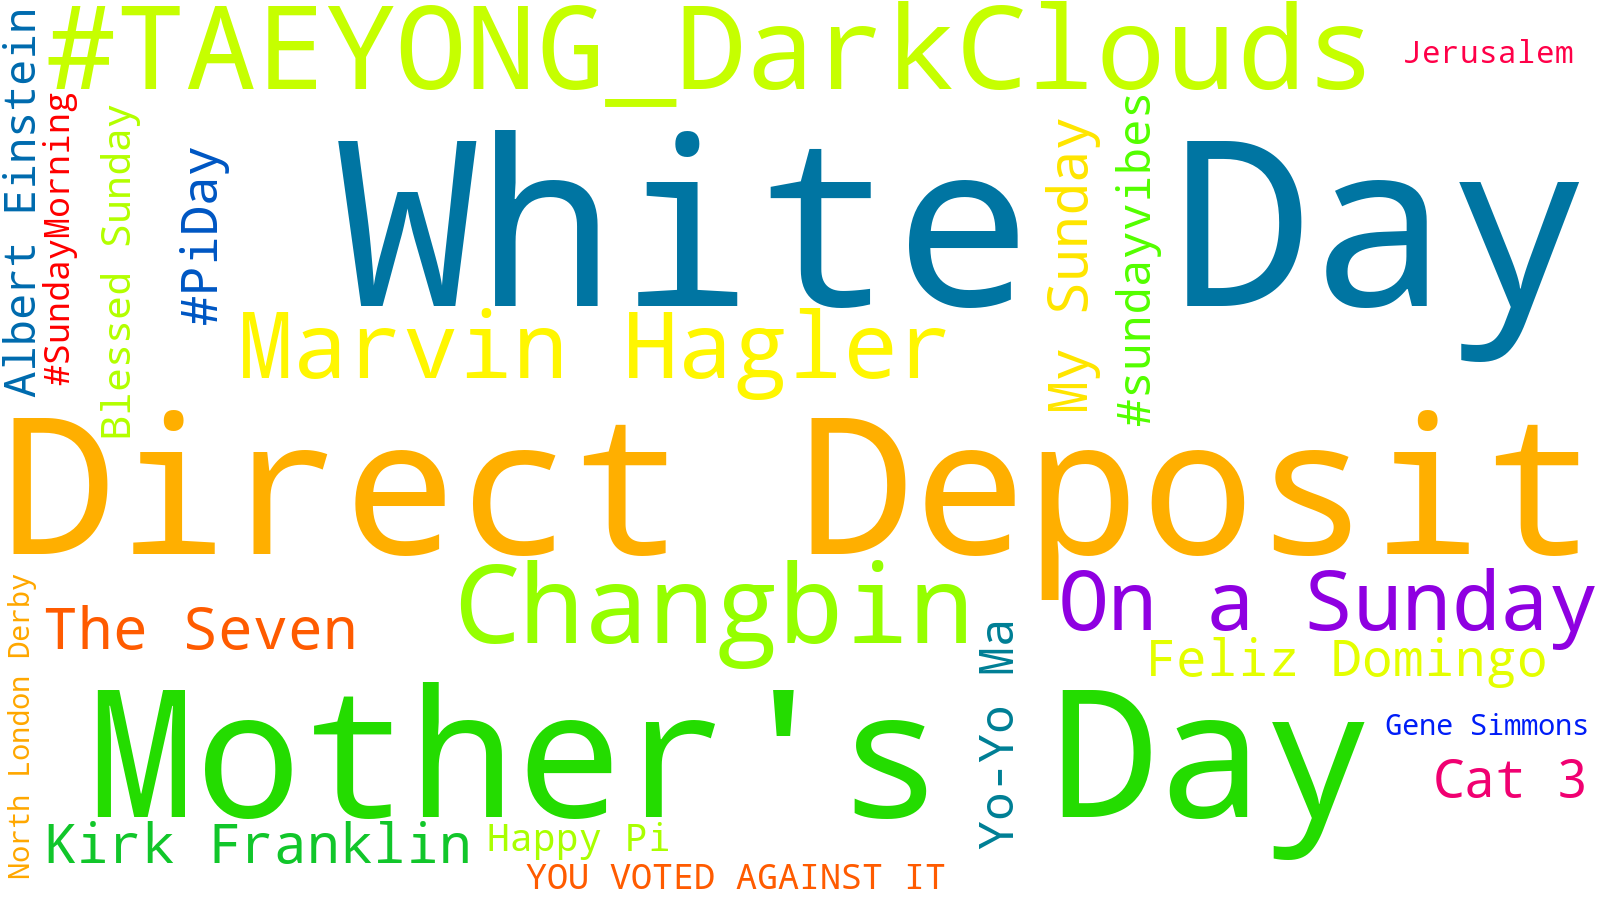

In [15]:
from IPython.display import Image

Image('TrendingTwitter.png') 